## Programming Exercise 2

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, util, img_as_bool, img_as_float

### 2.1 Image Averaging

#### 2.1.1
Load the image *shed.png* from the *resources* folder and display it.

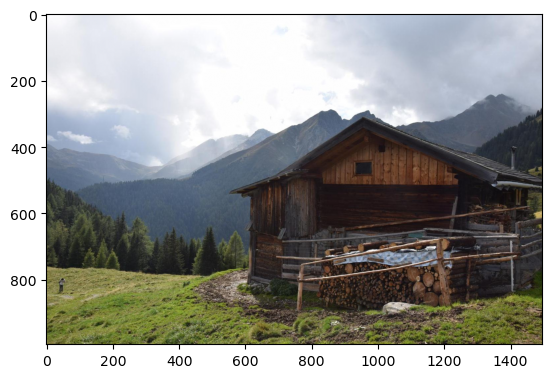

(995, 1496, 3)

In [10]:
img = img_as_float(io.imread("resources/shed.png"))
plt.imshow(img)
plt.show()
img.shape

#### 2.1.2
Impair the image with gaussian noise of variance `var=0.01` using the `util.random_noise` ([docs](https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise)) function from `skimage`.
Generate `N=5` noisy images using this procedure and store them in an array. Display the first 4 images in the array.

(5, 995, 1496, 3)


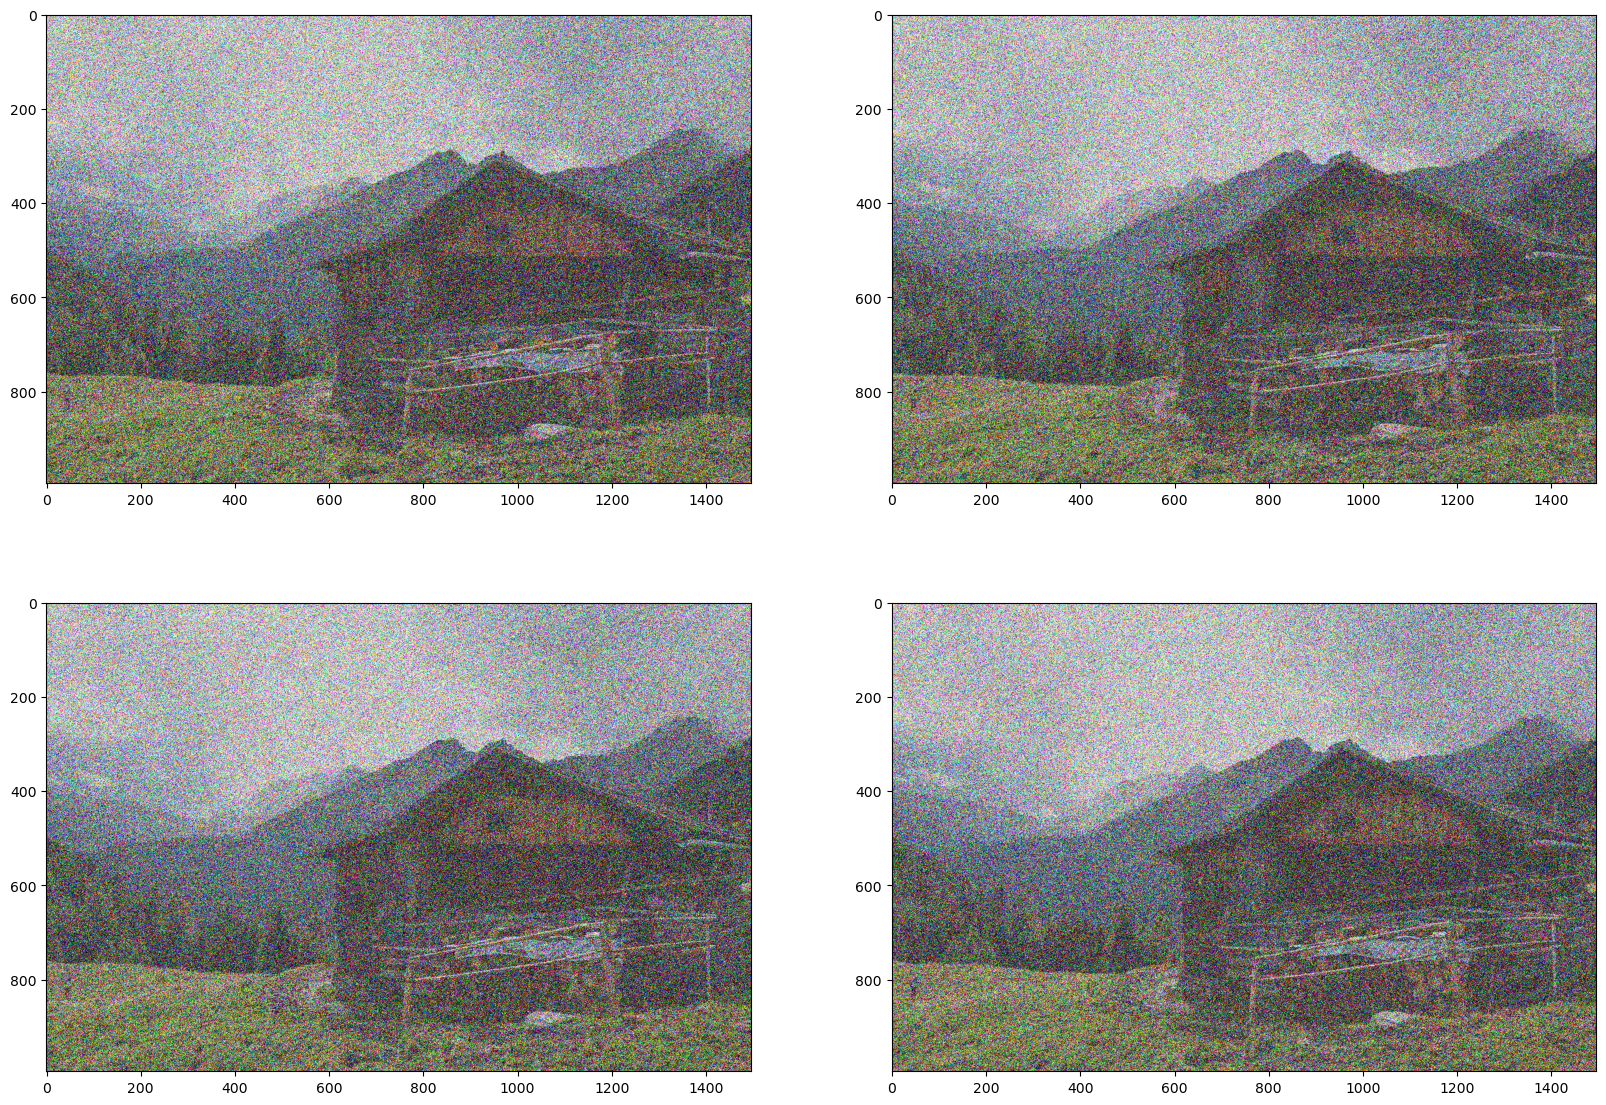

In [11]:
N=5
imgs_noisy_list=[]

for i in range(N):
    noisy_img=util.random_noise(img,var=0.5)
    imgs_noisy_list.append(noisy_img)
imgs_noisy=np.stack(imgs_noisy_list,axis=0)
print(imgs_noisy.shape)


# Visualization
fig, axs = plt.subplots(2, 2, figsize=(20, 14))
for i, img_noisy in enumerate(imgs_noisy[:4]):
    axs.flat[i].imshow(img_noisy)
plt.show()

#### 2.1.3
Assume a scenario, where the camera produces very noisy images but the captured scene is largely static. In this case, we can use image averaging to reduce the noise. Average the `N` noisy images generated in subtask 2.1.2 and display the result. Try different values for `N` and `var`.

(995, 1496, 3)


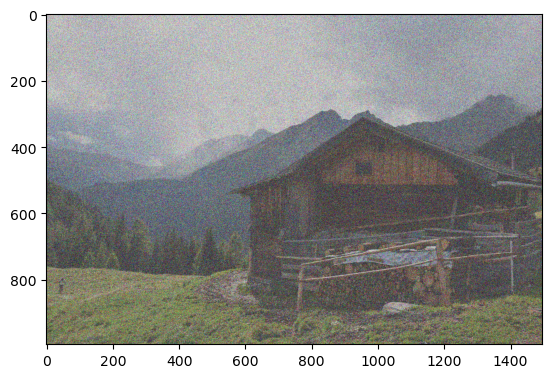

In [12]:
img_avg=np.mean(imgs_noisy,axis=0)
print(img_avg.shape)
# Visualization
plt.imshow(img_avg)
plt.show()

### 2.2 Morphological Filtering

#### 2.2.1
Load the image *object.png* from the *resources* folder, convert it to `bool` using `img_as_bool` and display it.

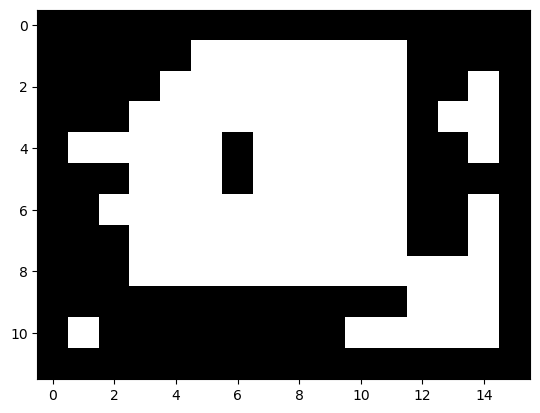

In [13]:
img = img_as_bool(io.imread("resources/object.png"))
plt.imshow(img, cmap='gray')
plt.show()

#### 2.2.2
Perform an erosion, dilation, opening and closing of the image with a 3x3 square structuring element and display the results.

*Hint: The `morphology` module from `skimage` could be useful ([docs](https://scikit-image.org/docs/stable/api/skimage.morphology.html)).*

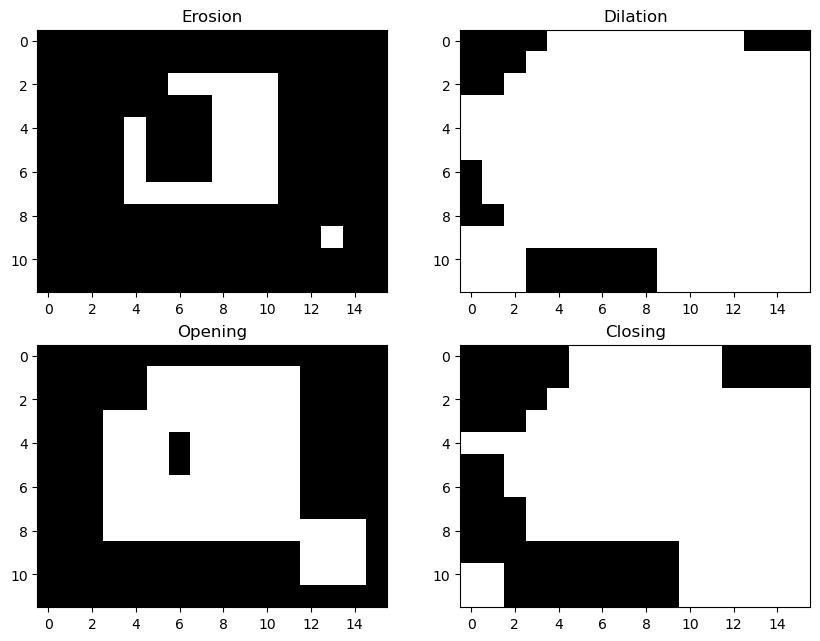

In [14]:
img_eroded=morphology.binary_erosion(img,footprint=[(np.ones((3, 1)), 1), (np.ones((1, 3)), 1)])
img_dilated=morphology.binary_dilation(img,footprint=[(np.ones((3, 1)), 1), (np.ones((1, 3)), 1)])
img_opened=morphology.binary_opening(img,footprint=[(np.ones((3, 1)), 1), (np.ones((1, 3)), 1)])
img_closed=morphology.binary_closing(img,footprint=[(np.ones((3, 1)), 1), (np.ones((1, 3)), 1)])

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 7.5))
axs[0, 0].imshow(img_eroded, cmap='gray'), axs[0, 0].set_title("Erosion")
axs[0, 1].imshow(img_dilated, cmap='gray'), axs[0, 1].set_title("Dilation")
axs[1, 0].imshow(img_opened, cmap='gray'), axs[1, 0].set_title("Opening")
axs[1, 1].imshow(img_closed, cmap='gray'), axs[1, 1].set_title("Closing")
plt.show()

#### 2.2.3
Create the structuring elements described below, perform a dilation on the image and display the results.
* 3x3 centered plus (+)
* 3x3 centered minus (-)
* 3x3 cross (x)

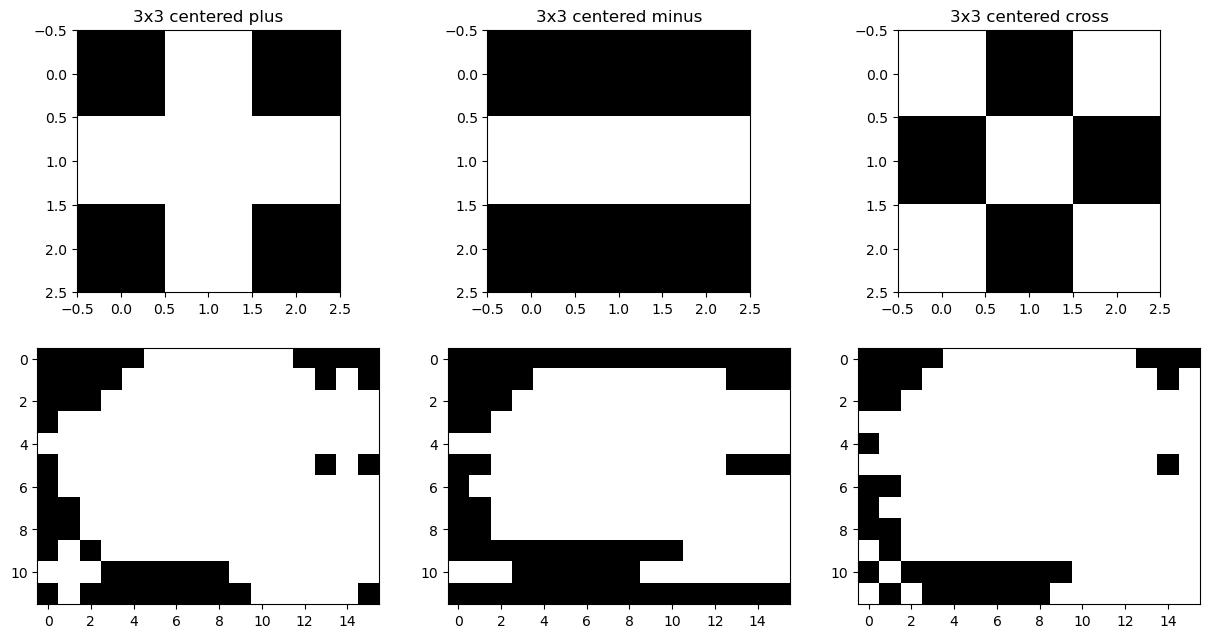

In [15]:
s_plus=np.array([[0,1,0],[1,1,1],[0,1,0]])
s_minus=np.array([[0,0,0],[1,1,1],[0,0,0]])
s_cross=np.array([[1,0,1],[0,1,0],[1,0,1]])
img_dilated_plus=morphology.binary_dilation(img,footprint=s_plus)
img_dilated_minus=morphology.binary_dilation(img,footprint=s_minus)
img_dilated_cross=morphology.binary_dilation(img,footprint=s_cross)
# Visualization
fig, axs = plt.subplots(2, 3, figsize=(15, 7.5))
axs[0, 0].imshow(s_plus, cmap='gray'), axs[0, 0].set_title("3x3 centered plus")
axs[0, 1].imshow(s_minus, cmap='gray'), axs[0, 1].set_title("3x3 centered minus")
axs[0, 2].imshow(s_cross, cmap='gray'), axs[0, 2].set_title("3x3 centered cross")
axs[1, 0].imshow(img_dilated_plus, cmap='gray')
axs[1, 1].imshow(img_dilated_minus, cmap='gray')
axs[1, 2].imshow(img_dilated_cross, cmap='gray')
plt.show()

#### 2.2.4
Perform an eXclusive OR (XOR) operation between the eroded/dilated image from subtask 2.2.2 and the original image to detect the inner/outer boundaries of the object, and display the results.

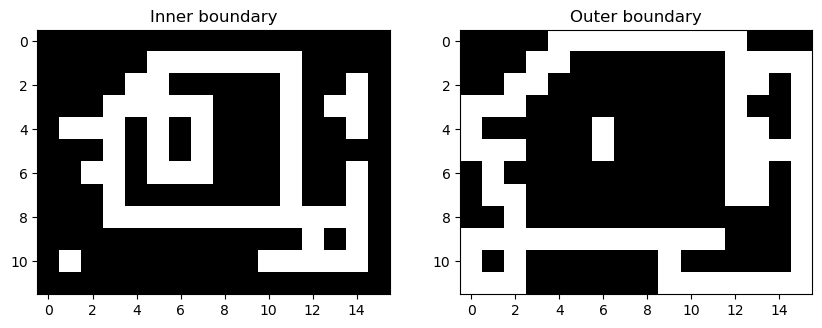

In [16]:
inner_boundary=np.logical_xor(img,img_eroded).astype(int)
outer_boundary=np.logical_xor(img,img_dilated).astype(int)
# Visualization
fig, axs = plt.subplots(1, 2, figsize=(10, 3.75))
axs[0].imshow(inner_boundary, cmap='gray'), axs[0].set_title("Inner boundary")
axs[1].imshow(outer_boundary, cmap='gray'), axs[1].set_title("Outer boundary")
plt.show()

#### 2.2.5

After obtaining the boundaries, the flood-fill algorithm can be used to fill the object again. Use the algorithm to fill the inner and outer boundary images from subtask 2.2.4 using the `morphology.flood_fill` ([docs](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.flood_fill)) function and display the results. How does the seed point affect the result?

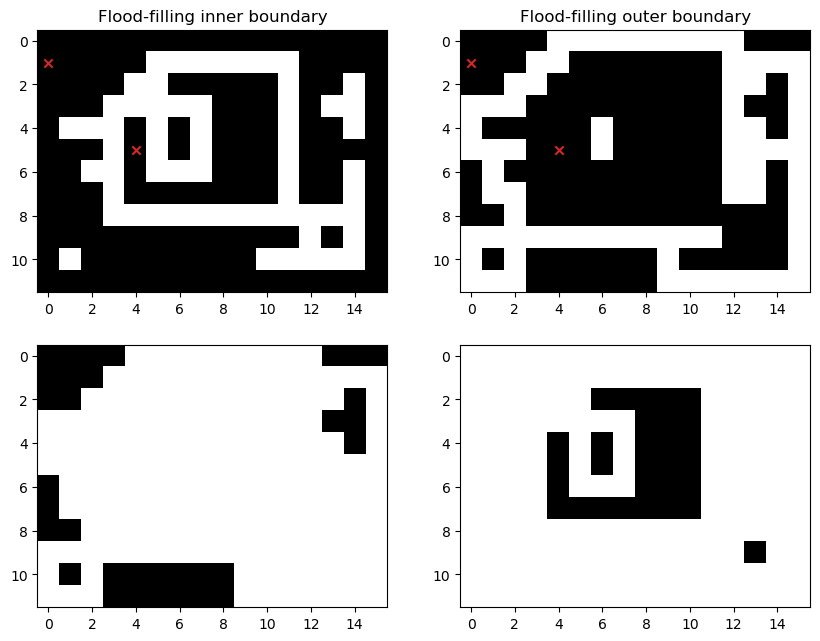

In [17]:
seed_point=[(1,5),(0,4)]
img_inner_filled=morphology.flood_fill(outer_boundary,seed_point[0],new_value=1)
img_outer_filled=morphology.flood_fill(inner_boundary,seed_point[1],new_value=1)
# Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 7.5))
axs[0, 0].imshow(inner_boundary, cmap='gray'), axs[0, 0].set_title("Flood-filling inner boundary")
axs[0, 0].scatter(seed_point[1], seed_point[0], color='tab:red', marker='x')
axs[1, 0].imshow(img_inner_filled, cmap='gray')
axs[0, 1].imshow(outer_boundary, cmap='gray'), axs[0, 1].set_title("Flood-filling outer boundary")
axs[0, 1].scatter(seed_point[1], seed_point[0], color='tab:red', marker='x')
axs[1, 1].imshow(img_outer_filled, cmap='gray')
plt.show()